## Monte Carlo Simulation (Dice)

In [7]:
import matplotlib.pyplot as plt
import random

## The Dice Game

#### The game will involve two six-sided dice. In order to win, the player needs to roll the same number on both dice. The house has more opportunities to win (30 outcomes vs. the player’s 6 outcomes), meaning the house has the quite the advantage. our player starts with a balance of 1,000 dollars and is prepared to lose it all, so they bet 1 dollar on every roll (meaning both dice are rolled) and decide to play 1,000 rolls. Because the house is so generous, they offer to payout 4 times the player’s bet when the player wins. For example, if the player wins the first roll, their balance increases by 4, and they end the round with a balance of 1,004dollars. If they miraculously went on a 1,000 roll win-streak, they could go home with 5,000 dollars. If they lost every round, they could go home with nothing.

In [12]:
# Creating Roll Dice Function
def roll_dice():
    die_1 = random.randint(1, 6)
    die_2 = random.randint(1, 6)

    # Determining if the dice are the same number
    if die_1 == die_2:
        same_num = True
    else:
        same_num = False
    return same_num

### Inputs and Tracking Variables
#### Every Monte Carlo simulation will require you to know what your inputs are and what information you are looking to obtain. We already defined what our inputs are when we described the game. We said our number of rolls per game is 1,000, and the amount the player will be betting each roll is 1 dollar. In addition to our input variables, we need to define how many times we want to simulate the game. We can use the num_simulations variable as our Monte Carlo simulation count. The higher we make this number, the more accurate the predicted probability is to its true value. We will track the win probability (wins per game divided by the total number of rolls) and ending balance for each simulation (or round). These are initialized as lists and will be updated at the end of each round.

In [13]:
# Inputs
num_simulations = 10000 #maximum defined rounds of the game, if there is any remaining money
max_num_rolls = 1000 #predetermined per instructions above
bet = 1 #$1 bet per round

# Tracking
win_probability = []
end_balance = []

### Monte Carlo Simulation and Visualization

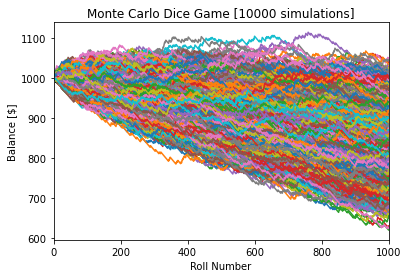

In [21]:
# For loop to run for the number of simulations desired
for i in range(num_simulations):
    balance = [1000]
    num_rolls = [0]
    num_wins = 0
    # Run until the player has rolled 1,000 times
    while num_rolls[-1] < max_num_rolls:
        same = roll_dice()
        # Result if the dice are the same number
        if same:
            balance.append(balance[-1] + 4 * bet)
            num_wins += 1
        # Result if the dice are different numbers
        else:
            balance.append(balance[-1] - bet)

        num_rolls.append(num_rolls[-1] + 1)
# Store tracking variables and add line to figure
    win_probability.append(num_wins/num_rolls[-1])
    end_balance.append(balance[-1])
    
    plt.plot(num_rolls, balance)
    plt.title("Monte Carlo Dice Game [" + str(num_simulations) + " simulations]")
    plt.xlabel("Roll Number")
    plt.ylabel("Balance [$]")
    plt.xlim([0, max_num_rolls])


### Simulation Results

In [23]:
# Avg win prob and end balance
overall_win_probability = sum(win_probability)/len(win_probability)
overall_end_balance = sum(end_balance)/len(end_balance)

#Display the averages
print("Average win probability after " + str(num_simulations) + "   runs: " + str(overall_win_probability))
print("Average ending balance after " + str(num_simulations) + " runs: $" + str(overall_end_balance))

Average win probability after 10000   runs: 0.1666443587416805
Average ending balance after 10000 runs: $833.221793708409


### Conclusion: the house always wins, albeit in this instance very slowly. The probability of winning for a particular round is only 16.7%, but because the payout is so high (4 dollars), the customer can stay in the game for a very long time.

### Adjust the parameters to see how the simulation is impacted.

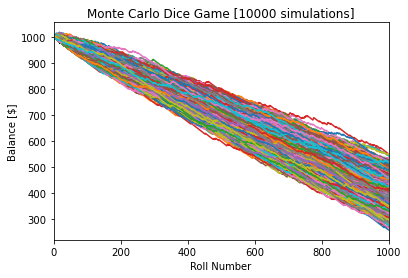

In [24]:
# Creating Roll Dice Function with 10-sided dice
def roll_dice():
    die_1 = random.randint(1, 10)
    die_2 = random.randint(1, 10)

    # Determining if the dice are the same number
    if die_1 == die_2:
        same_num = True
    else:
        same_num = False
    return same_num

# Inputs - no changes
num_simulations = 10000 #maximum defined rounds of the game, if there is any remaining money
max_num_rolls = 1000 #predetermined per instructions above
bet = 1 #$1 bet per round

# Tracking
win_probability = []
end_balance = []

# For loop to run for the number of simulations desired - change payout to $3
for i in range(num_simulations):
    balance = [1000]
    num_rolls = [0]
    num_wins = 0
    # Run until the player has rolled 1,000 times
    while num_rolls[-1] < max_num_rolls:
        same = roll_dice()
        # Result if the dice are the same number
        if same:
            balance.append(balance[-1] + 3 * bet)
            num_wins += 1
        # Result if the dice are different numbers
        else:
            balance.append(balance[-1] - bet)

        num_rolls.append(num_rolls[-1] + 1)
# Store tracking variables and add line to figure
    win_probability.append(num_wins/num_rolls[-1])
    end_balance.append(balance[-1])
    
    plt.plot(num_rolls, balance)
    plt.title("Monte Carlo Dice Game [" + str(num_simulations) + " simulations]")
    plt.xlabel("Roll Number")
    plt.ylabel("Balance [$]")
    plt.xlim([0, max_num_rolls])

In [27]:
# Avg win prob and end balance
overall_win_probability = sum(win_probability)/len(win_probability)
overall_end_balance = sum(end_balance)/len(end_balance)

#Display the averages
print("Average win probability after " + str(num_simulations) + "   runs: " + str(overall_win_probability))
print("Average ending balance after " + str(num_simulations) + " runs: $" + str(overall_end_balance))

Average win probability after 10000   runs: 0.09995760000000121
Average ending balance after 10000 runs: $399.8304


### Conclusion: With decreased odds of winning (1:6 to 1:10) and a decreased payout per win (4 dollars to 3 dollars), the probability of winning a particular round has dropped to 10% and the balance after 10,000 simulations is on 399 dollars.